# LINEAR REGRESSION MODELS PART 3

## CONTENTS

__1.INTRODUCTION__

__2.LIBRARIES AND DATA__
       
__3.PREPROCESSING__

__4.RIDGE REGRESSION__
             
__5.LASSO REGRESSION__

__6.RESULTS__


## 1. INTRODUCTION

In this Jupyter Notebook, we'll delve into the implementation of the shrinkage methods Ridge and Lasso. Essentially, these techniques can be viewed as a form of variable selection since they have the tendency to zero out coefficients associated with redundant predictors. So, once again, we're effectively engaging in a form of variable selection through the application of these shrinkage methods.

## 2. LIBRARIES AND DATA

__Libraries__

In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

__Importing data__

In [2]:
data1 = pd.read_csv("train_dataset.csv") 
data2 = pd.read_csv("test_dataset.csv") 

# Train and test Dataset
train_df = data1.copy()
test_df = data2.copy()

In [3]:
train_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,245.0,95,196.0,535.2,46870,33642,14.4,0.0,46611.30,42.0,40.4,44.3,2.31,51.1,17.2,43.0,4.7,44.1,9.6,54.6,5.4,70.2,46.0,38.5,19.5,96.374269,1.684211,0.526316,0.181287,47.898380,4.048468,0,0
1,241.0,112,182.4,408.4,36424,41459,18.8,0.0,35815.95,45.8,44.9,46.7,2.47,55.0,22.0,43.5,3.2,37.2,11.6,47.7,9.2,52.4,28.7,44.9,23.5,66.207829,0.304282,1.144679,1.113285,52.937625,4.550419,0,0


In [4]:
test_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,104.0,46,170.4,401.9,38504,22633,21.5,0.0,38888.25,34.0,32.6,35.6,2.28,43.1,4.9,13.0,5.8,33.6,14.1,51.8,8.4,65.3,43.2,35.9,19.1,73.337436,23.915432,0.835128,0.492286,44.130860,3.697749,0,0
1,20.0,10,187.4,400.6,43883,3091,12.1,0.0,43962.70,49.5,47.7,50.5,2.21,61.0,11.9,14.8,14.2,42.3,10.0,62.2,3.1,75.6,44.3,35.3,14.8,97.907950,1.223045,0.193112,0.418410,53.957879,7.992565,0,0


## 3. PREPROCESSING

In [5]:
# Defining kfold validation
cv = KFold(n_splits=5) 

In [6]:
# Defining X_train, Y_train, X_test, Y_test
X_train = train_df.drop(columns = 'TARGET_deathRate')
Y_train = train_df[ 'TARGET_deathRate']

X_test = test_df.drop(columns = 'TARGET_deathRate')
Y_test = test_df[ 'TARGET_deathRate']

# Creating lists with the columns names
cols = X_train.columns

# Scaling the Xs
X_train_sc = StandardScaler().fit_transform(X_train)
X_test_sc = StandardScaler().fit_transform(X_test)

# Creating Dataframes
X_train = pd.DataFrame(X_train_sc, columns=cols)
X_test = pd.DataFrame(X_test_sc, columns=cols)

In [7]:
X_train.head(2)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,-0.271292,-0.096338,1.668508,0.208378,-0.240801,-0.491120,-0.313034,0.077867,0.167429,0.104674,0.338603,-0.333879,-0.126548,-0.164616,0.832046,-0.243324,1.263284,-0.619932,0.150399,-0.733139,0.654095,0.671201,0.201664,-0.014851,0.752912,-0.490384,-0.268433,-0.505071,-0.568648,-0.796973,-0.800617,-0.376979
1,-0.278109,0.012097,-0.745916,-0.957016,-0.147741,0.268412,-0.313034,-0.820140,0.891139,0.952944,0.789650,0.035530,0.467398,0.414138,0.886482,-0.609210,0.213044,-0.188110,-0.717923,0.382208,-1.136868,-1.334959,1.095785,0.700492,-1.229780,-0.590300,0.164841,-0.214382,0.272010,-0.549130,-0.800617,-0.376979


In [8]:
X_test.head(2)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,-0.535776,-0.482357,-0.811309,-0.695418,-0.423052,0.711498,-0.430235,-0.549236,-1.543721,-1.584673,-1.433122,-0.435373,-1.342823,-1.828754,-2.534765,-0.080493,-0.278430,0.236317,-0.256114,0.259405,0.096920,0.289552,-0.193297,-0.097635,-0.710776,1.043995,-0.071135,-0.340946,-1.173046,-1.041237,-0.805387,-0.43617
1,-0.691452,-0.723055,-0.835777,-0.166677,-0.658396,-0.803441,-0.430235,-0.171898,1.565093,1.453400,1.471794,-0.614601,1.305114,-0.870298,-2.331803,1.936349,1.072236,-0.582000,1.000732,-1.308176,1.098895,0.412094,-0.273350,-0.809507,0.825977,-0.518157,-0.324313,-0.361411,0.493556,1.455234,-0.805387,-0.43617


In [9]:
# Defining Grid for GridSearchCV

grid = dict()
grid['alpha'] = arange(0,100, 0.01)

## 4. RIDGE REGRESSION

In [10]:
# Instantiating GridSearchCV 

Ridge_search = GridSearchCV(Ridge(max_iter = 100000, random_state = 126), 
                            grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, verbose = 1)

In [11]:
# Searching for the best parameters 

CV_Ridge_results = Ridge_search.fit(X_train, Y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


In [12]:
# Best alpha parameter 

alpha_ridge = CV_Ridge_results.best_params_['alpha']

In [13]:
# Instantiating the best model

RidgeModel = Ridge(max_iter = 100000, random_state = 126, 
                   alpha = alpha_ridge).fit(X_train ,Y_train)

In [14]:
# Getting the Ridge R^2

Ridge_R2 = RidgeModel.score(X_train, Y_train)

In [15]:
# Getting predictions and training MSE 

RidgePredictions = RidgeModel.predict(X_train)
Ridge_Training_MSE = np.round(mean_squared_error(Y_train, RidgePredictions),2)

In [16]:
# Getting kfold MSE 

ridge_cv_MSE = round(np.mean(cross_val_score(RidgeModel, X_train, Y_train, cv=cv, 
                                          scoring='neg_mean_squared_error', error_score='raise') * (-1)),1)

In [17]:
# Getting predictions and test MSE 

RIDGE_predictions = RidgeModel.predict(X_test)
RIDGE_Test_MSE = round(mean_squared_error(Y_test, RIDGE_predictions), 2)

In [18]:
# Dictionary that holds the performance metrics 

dict1 = {'Ridge Regression': (np.round(Ridge_R2,3), Ridge_Training_MSE,
                                            ridge_cv_MSE, RIDGE_Test_MSE )}

In [19]:
# Creating a dataframe to easily present the results 

Evaluation_df = pd.DataFrame(dict1, index=['R^2','Training_MSE','Training_MSE (KFold)', 'Test_MSE'])

In [20]:
# Displaying the metrics

Evaluation_df

,Ridge Regression
R^2,0.512
Training_MSE,352.830
Training_MSE (KFold),369.600
Test_MSE,314.350


## 5. LASSO REGRESSION

In [21]:
# Instantiating GridSearchCV 

Lasso_search = GridSearchCV(Lasso(max_iter = 100000, random_state = 126), 
                            grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, verbose = 1)

In [22]:
# Searching for the best parameters

CV_Lasso_results = Lasso_search.fit(X_train, Y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


In [23]:
# Best alpha parameter 

alpha_lasso = CV_Lasso_results.best_params_['alpha']

In [24]:
# Instantiating the best model

LassoModel = Lasso(max_iter = 100000, random_state = 126, 
                   alpha = alpha_lasso).fit(X_train ,Y_train)

In [25]:
# Getting the Lasso R^2

Lasso_R2 = LassoModel.score(X_train, Y_train)

In [26]:
# Getting predictions and training MSE 

LassoPredictions = LassoModel.predict(X_train)
Lasso_Training_MSE = np.round(mean_squared_error(Y_train, LassoPredictions),2)

In [27]:
# Getting kfold MSE 

lasso_cv_MSE = round(np.mean(cross_val_score(LassoModel, X_train, Y_train, cv=cv, 
                                          scoring='neg_mean_squared_error', error_score='raise') * (-1)),1)

In [28]:
# Getting predictions and test MSE 

LASSO_predictions = LassoModel.predict(X_test)
LASSO_Test_MSE = round(mean_squared_error(Y_test, LASSO_predictions), 2)

In [29]:
# Dictionary that holds the performance metrics 

dict2 = {'Lasso Regression': (np.round(Lasso_R2,3), Lasso_Training_MSE,
                                            lasso_cv_MSE, LASSO_Test_MSE )}

In [30]:
# Creating a dataframe to easily present the results 

Evaluation_df1 = pd.DataFrame(dict2, index=['R^2','Training_MSE','Training_MSE (KFold)', 'Test_MSE'])

In [31]:
# Displaying the metrics

Evaluation_df1

,Lasso Regression
R^2,0.512
Training_MSE,352.890
Training_MSE (KFold),369.700
Test_MSE,314.250


## 6. RESULTS

__Aggragated Results__

In [32]:
Linear_Regression_Models_Part3_Results = pd.concat([Evaluation_df, Evaluation_df1], axis = 1)
Linear_Regression_Models_Part3_Results

,Ridge Regression,Lasso Regression
R^2,0.512,0.512
Training_MSE,352.830,352.890
Training_MSE (KFold),369.600,369.700
Test_MSE,314.350,314.250


__Residuals's Plots__

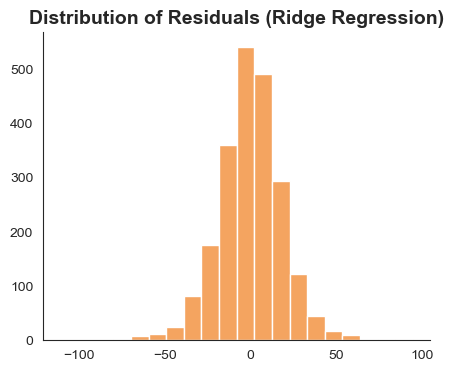

In [33]:
residuals_ridge = RidgePredictions - Y_train 

sns.set_style("white")
    
plt.figure(figsize=(5,4))
    
plt.hist(residuals_ridge, bins = 20, color = "sandybrown")
    
plt.title(label = "Distribution of Residuals (Ridge Regression)" , fontsize = 14, weight = 'bold')
    
sns.despine()
    
plt.show()

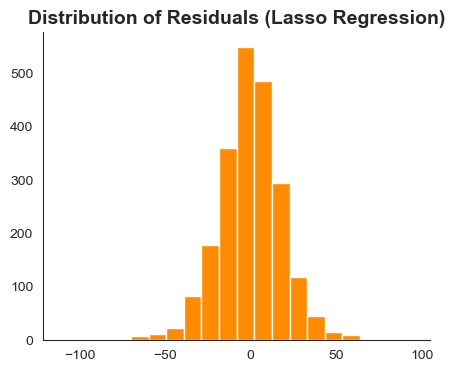

In [34]:
residuals_lasso = LassoPredictions - Y_train 

sns.set_style("white")
    
plt.figure(figsize=(5,4))
    
plt.hist(residuals_lasso, bins = 20, color = "darkorange")
    
plt.title(label = "Distribution of Residuals (Lasso Regression)" , fontsize = 14, weight = 'bold')
    
sns.despine()
    
plt.show()

Both models yield comparable results.

__Examining the coefficients__

In [35]:
# Creating empty dictionaries
dict3 = {}

dict4 = {}

# Update the dictionaries with the variables' names and the corresponding coefficients  for each model
for i in range(0, len(cols)):
    dict3.update({cols[i] : list(RidgeModel.coef_)[i]})

for i in range(0, len(cols)):
    dict4.update({cols[i] : list(LassoModel.coef_)[i]})
    
# Turning the dictionaries into series
coef_df_ridge = pd.DataFrame(dict3, index=['Ridge Coefficients'])

coef_df_lasso = pd.DataFrame(dict4, index=['Lasso Coefficients'])

# Combining the series into a df
coef_df = pd.concat([coef_df_ridge, coef_df_lasso], axis = 0)
coef_df

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
Ridge Coefficients,-1.633030,6.968492,9.053623,-0.803855,-5.950901,0.627745,-0.187551,1.142966,-1.744974,-1.687969,-0.051117,-0.091610,9.274517,-1.864769,2.541573,-1.205938,1.295155,-4.672612,-5.976143,1.299159,-5.351242,3.005182,-3.561650,2.712447,-2.252182,-2.229312,-0.016342,-2.005383,-8.549862,-1.512704,-0.978853,-4.992785
Lasso Coefficients,-1.601017,6.900577,9.062122,-0.132516,-5.913122,0.640321,-0.148697,0.664680,-2.097865,-1.551722,-0.000000,-0.021749,9.475061,-1.849044,2.522107,-1.179288,1.285816,-4.690879,-6.050506,1.236541,-5.604877,3.021510,-3.181724,2.319625,-2.006517,-1.995161,0.000000,-1.967185,-8.765123,-1.491349,-0.904422,-4.960329


We can observe that the Lasso model effectively sets the coefficients of the "redundant" predictors (medIncome, povertyPercent, MedianAgeFemale) to zero.

__Saving the Results__

In [36]:
Linear_Regression_Models_Part3_Results.to_csv(r'Linear_Regression_Models_Part3_Results.csv', index=True, 
                                              index_label= 'Metrics')